In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# code at: cs231n.data_utils
# convert: from scipy.misc import imread
# into: from imageio import imread
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/")

In [3]:
%cd '/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/'

/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1


# k-Nearest Neighbor (kNN) exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this exercise you will implement these steps and understand the basic Image Classification pipeline, cross-validation, and gain proficiency in writing efficient, vectorized code.

In [0]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# make matplotlib figures apper inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# reload exteral python modules;
%load_ext autoreload
%autoreload 2

In [5]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Clean up variables
try:
    del X_train, y_train
    del X_test, y_test
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


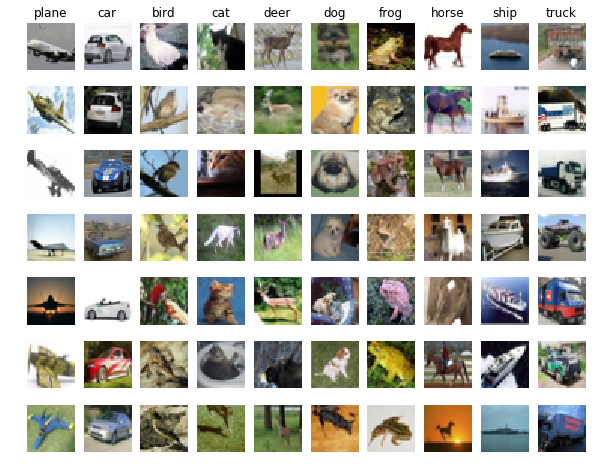

In [6]:
# Visualize some examples from the dataset.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog' 
           , 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    # Only get idxs of y_train == y
    idxs = np.flatnonzero(y_train == y)
    # replace false means no repeat.
    idxs = np.random.choice(idxs, samples_per_class, replace=False)  
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
# Subsample the data for more efficient code execution in this exercise.
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [37]:
# from google.colab import files
# files.upload()

Saving k_nearest_neighbor.py to k_nearest_neighbor.py


{'k_nearest_neighbor.py': b'from builtins import range\nfrom builtins import object\nimport numpy as np\nfrom past.builtins import xrange\nfrom collections import Counter\n\n\nclass KNearestNeighbor(object):\n    """ a kNN classifier with L2 distance """\n\n    def __init__(self):\n        pass\n\n    def train(self, X, y):\n        """\n        Train the classifier. For k-nearest neighbors this is just\n        memorizing the training data.\n\n        Inputs:\n        - X: A numpy array of shape (num_train, D) containing the training data\n          consisting of num_train samples each of dimension D.\n        - y: A numpy array of shape (N,) containing the training labels, where\n             y[i] is the label for X[i].\n        """\n        self.X_train = X\n        self.y_train = y\n\n    def predict(self, X, k=1, num_loops=0):\n        """\n        Predict labels for test data using this classifier.\n\n        Inputs:\n        - X: A numpy array of shape (num_test, D) containing t

In [0]:
# from k_nearest_neighbor import KNearestNeighbor
# import k_nearest_neighbor

In [38]:
import importlib
importlib.reload(k_nearest_neighbor)

<module 'k_nearest_neighbor' from '/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/k_nearest_neighbor.py'>

In [0]:
from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [13]:
# Open cs231n/classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test implementation
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


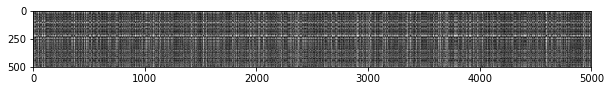

In [14]:
# visualize the distance matrix: each row is a single test example
# and its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

**Inline Question 1** 

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

$\color{blue}{\textit Your Answer:}$ As we are working directly with pixel values rather than more specialized feature representations, the bright rows are given by the intensity values of the images we are comparing, i.e., a test image with very high intensity values is being compared with training images of low intensity values or vice versa (high distances). The same occurs with the columns but instead we are comparing a training image with all test images


In [15]:
# k = 1
y_test_pred = classifier.predict_labels(dists, k=1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [16]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 145 / 500 correct => accuracy: 0.290000


**Inline Question 2**

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

$\color{blue}{\textit Your Answer:}$


$\color{blue}{\textit Your Explanation:}$


In [17]:
# Now lets speed up distance matrix computation by using partial vectorization
dists_one = classifier.compute_distances_one_loop(X_test)

# Ensure vectorized implementation is correct using Frobenius norm
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('One loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The difference matrices are the same')
else:
    print('Uh-oh! The distance matrices are differenct')

One loop difference was: 0.000000
Good! The difference matrices are the same


In [0]:
# The Broadcasting Rule
# In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.

In [19]:
dists_two = classifier.compute_distances_no_loops(X_test)
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('No loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

No loop difference was: 0.000000
Good! The distance matrices are the same


In [21]:
# Compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in second) 
    that it took to execute
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

Two loop version took 32.214707 seconds
One loop version took 38.967948 seconds
No loop version took 0.477922 seconds


### Cross-validation

We set the value k = 5 arbitrarily.
We will now determine the best values of this hyperparameter with corss-validation.

In [0]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}

################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
        X_train_fold = np.concatenate([fold 
                                 for j, fold in enumerate(X_train_folds) 
                                 if i != j])
        y_train_fold = np.concatenate([fold
                                 for j, fold in enumerate(y_train_folds)
                                 if i != j])
        
        # Train the model without validationset
        classifier.train(X_train_fold, y_train_fold)
        dists = classifier.compute_distances_no_loops(X_train_folds[i])
        
        # predict labels
        y_pred_fold = classifier.predict_labels(dists, k)
        
        # Compute the fraction of correctly predicted examples
        num_correct = np.sum(y_pred_fold == y_train_folds[i])
        accuracy = float(num_correct) / X_train_folds[i].shape[0]
        k_to_accuracies[k].append(accuracy)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [30]:
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.257000
k = 3, accuracy = 0.263000
k = 3, accuracy = 0.273000
k = 3, accuracy = 0.282000
k = 3, accuracy = 0.270000
k = 5, accuracy = 0.265000
k = 5, accuracy = 0.275000
k = 5, accuracy = 0.295000
k = 5, accuracy = 0.298000
k = 5, accuracy = 0.284000
k = 8, accuracy = 0.272000
k = 8, accuracy = 0.295000
k = 8, accuracy = 0.284000
k = 8, accuracy = 0.298000
k = 8, accuracy = 0.290000
k = 10, accuracy = 0.272000
k = 10, accuracy = 0.303000
k = 10, accuracy = 0.289000
k = 10, accuracy = 0.292000
k = 10, accuracy = 0.285000
k = 12, accuracy = 0.271000
k = 12, accuracy = 0.305000
k = 12, accuracy = 0.285000
k = 12, accuracy = 0.289000
k = 12, accuracy = 0.281000
k = 15, accuracy = 0.260000
k = 15, accuracy = 0.302000
k = 15, accuracy = 0.292000
k = 15, accuracy = 0.292000
k = 15, accuracy = 0.285000
k = 20, accuracy = 0.268000
k = 20, accu

In [28]:
k_to_accuracies

{1: 0.0,
 3: 0.0,
 5: 0.0,
 8: 0.0,
 10: 0.0,
 12: 0.0,
 15: 0.0,
 20: 0.0,
 50: 0.0,
 100: 0.0}

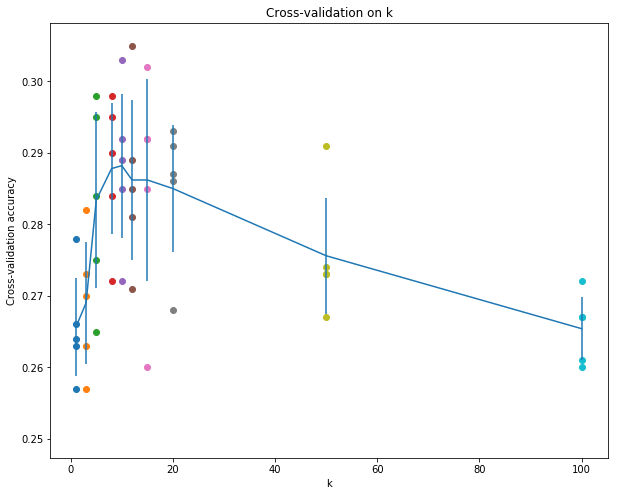

In [31]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
# Plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [33]:
# Based on the cross-validation results above, choose the best value for k,
# retrain the classifier using all the training data, and test it on the test data.

best_k = k_choices[accuracies_mean.argmax()]

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 144 / 500 correct => accuracy: 0.288000


**Inline Question 3**

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

$\color{blue}{\textit Your Answer:}$ 
1. [FALSE] The decision boundary of the k-NN classifier is not linear, there is no a hyperplanethat separates two classes. For instance, 1-NN decision boundary is the concatenation of segments of a voronoi tessellation, which partitions the space in convext polygons (Veronoi cells).
2. [TRUE] The training error of a 1-NN will always be better than that of 5-NN because for each training example, itsnearest neighbor is always going to be itself, i.e., error of 1-NN equal to 0.
3. [False] The test error of a 1-NN will not always be better than 5-NN. It will depend on the data we are working with, thus cross validation is a way to determine the best k for the algorithm.
4. [True] Increasing the size of the training dataset incurs large number of comparisons between a test example and all the training dataset. In order to decrease the number of comparisons and time, we can use Approximate Nearest Neighbor techniques such as k-d trees or ball trees.


$\color{blue}{\textit Your Explanation:}$ 

